<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/viral_pneumonia_prediction_using_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
%matplotlib inline

Adding Train and Test Data

In [ ]:
normal_train='../input/chest-xray-pneumonia/chest_xray/train/NORMAL'
j_n=os.listdir(normal_train)
pneumonia_train='../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'
j_p=os.listdir(pneumonia_train)


train_='../input/chest-xray-pneumonia/chest_xray/train'
test_='../input/chest-xray-pneumonia/chest_xray/test'
val_='../input/chest-xray-pneumonia/chest_xray/val'

**Visulizing images**

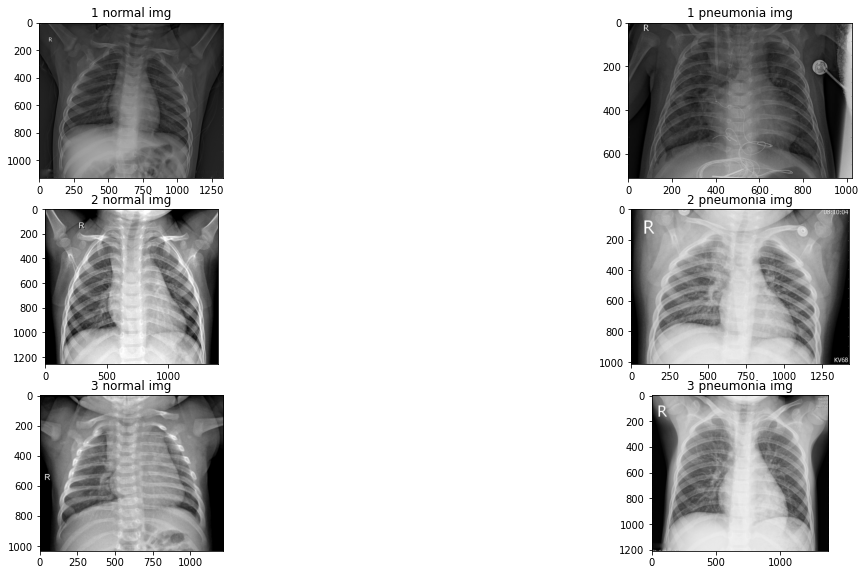

In [ ]:
fig=plt.figure(figsize=(20,20))
o=1
for i in range(3):
    fig.add_subplot(6,2,o)
    plt.title(str(i+1)+' normal img')
    j=cv2.imread(os.path.join(normal_train,j_n[i]))
    plt.imshow(j)
    o+=1
    fig.add_subplot(6,2,o)
    plt.title(str(i+1)+' pneumonia img')
    j=cv2.imread(os.path.join(pneumonia_train,j_p[i]))
    plt.imshow(j)
    o+=1
plt.show()

In [ ]:
print('total training normal images :', len(os.listdir(normal_train) ))
print('total training pneumonia images :', len(os.listdir(pneumonia_train ) ))


print('total training normal images :', len(os.listdir(train_)))
print('total validation normal images :', len(os.listdir(val_) ))
print('total testing normal images :', len(os.listdir(test_)))



total training normal images : 1341
total training pneumonia images : 3875
total training normal images : 2
total validation normal images : 2
total testing normal images : 2


Visulizing number of train and test data

Text(0, 0.5, 'no. of images')

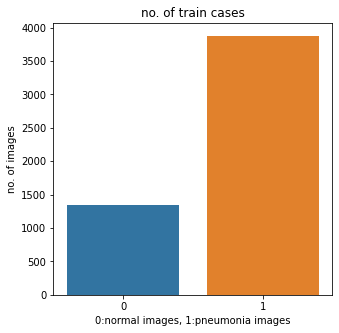

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x=[0,1], y= [len(j_n),len(j_p)])
plt.title('no. of train cases')
plt.xlabel('0:normal images, 1:pneumonia images')
plt.ylabel('no. of images')

Data Augmentation => here as we can asee we have less number of training data compare to test so first we need to augment our data 

Flow of Augmentation is, 
2.Scaling
3.Translation
4.Rotation (at 90 degrees)
5.Rotation (at finer angles)
6.Flipping
7.Adding some noise
8.Lighting condition
9.Perspective transform







In [ ]:
gen=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,
                       height_shift_range=0.1,shear_range=0.15,
                       zoom_range=0.1,channel_shift_range=10,horizontal_flip=True,vertical_flip=True,
                       fill_mode='constant',cval=125)



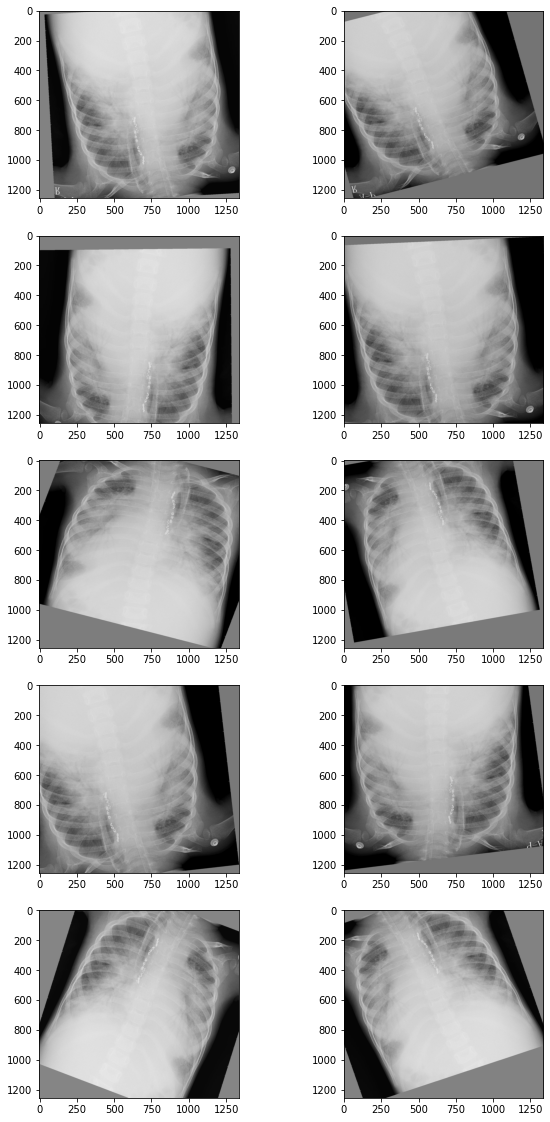

In [ ]:
#below function plots the  
def plots(figsize,images,a,b):
    fig=plt.figure(figsize=figsize)
    for i in range(1,len(images)+1):
        fig.add_subplot(a,b,i)
        plt.imshow(images[i-1])
    plt.show()
               
        
def create_images(path,j_p,i,pri):
    img_path=os.path.join(path,j_p[i])
    image=np.expand_dims(cv2.imread(img_path),0)
    aug_itter=gen.flow(image)#,save_to_dir=path,save_prefix='aug',save_format='jpeg')
    aug_images=[next(aug_itter)[0].astype(np.uint8) for i in range(10)]
    if pri=='print':
        plots((10,20),aug_images,5,2)


        
create_images(pneumonia_train,j_p,3,'print')

Load Train,Test,validation data

In [ ]:
train_gen=ImageDataGenerator(rescale=1./255)
train=train_gen.flow_from_directory(train_,
                                   target_size=(250,250),
                                   batch_size=10,
                                   class_mode='binary')


#loads augmented load_data
augmentation=ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.1,
                       height_shift_range=0.1,shear_range=0.15,
                       zoom_range=0.1,channel_shift_range=10,horizontal_flip=True,vertical_flip=True,
                       fill_mode='constant',cval=125)
train_augmentation=augmentation.flow_from_directory(train_,
                                target_size=(250,250),
                                batch_size=10,
                                class_mode='binary')


#loads test data
test_gen=ImageDataGenerator(rescale=1./255)
test=test_gen.flow_from_directory(test_,
                                  target_size=(250,250),
                                  batch_size=10,
                                  class_mode='binary')


#loads validaiton data
val_gen=ImageDataGenerator(rescale=1./255)
val=val_gen.flow_from_directory(test_,
                                target_size=(250,250),
                                batch_size=10,
                                class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(250,250,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 256)       2

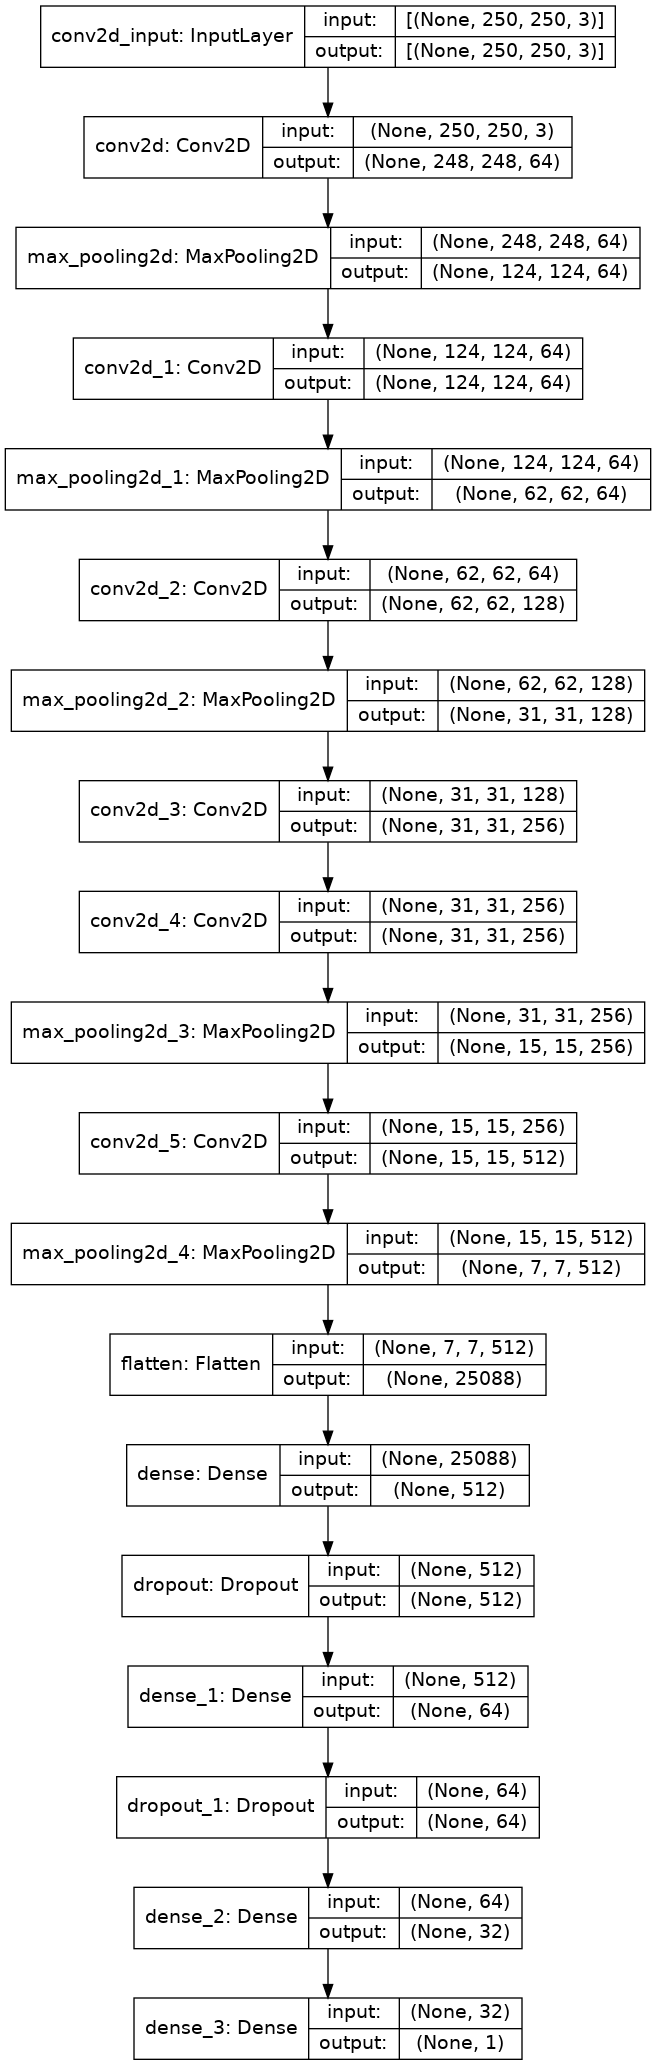

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from keras.optimizers import Adam
opt=Adam(lr=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['acc'])

#this function plots the graph between train and validation data parameters
def plot_metrics(history,epochs):
    epoch=range(1,epochs+1)
    loss=history.history['loss']
    accuracy=history.history['acc']
    vlos=history.history['val_loss']
    vacc=history.history['val_acc']
    plt.title('Loss graph')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(epoch,loss)
    plt.plot(epoch,vlos)
    plt.show()
    plt.title('Accuracy graph')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(epoch,accuracy)
    plt.plot(epoch,vacc)
    plt.show()

In [ ]:
epochs=15
history=model.fit_generator(train_augmentation,
                            steps_per_epoch=20,
                            epochs=epochs,
                            validation_data=val,
                            validation_steps=8,
                            verbose=1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
20/20 [==============================] - 48s 2s/step - loss: 0.6472 - acc: 0.8057 - val_loss: 0.7014 - val_acc: 0.6250
Epoch 2/15
20/20 [==============================] - 46s 2s/step - loss: 0.5590 - acc: 0.7641 - val_loss: 0.7093 - val_acc: 0.6125
Epoch 3/15
20/20 [==============================] - 45s 2s/step - loss: 0.5412 - acc: 0.7784 - val_loss: 0.6274 - val_acc: 0.7000
Epoch 4/15
20/20 [==============================] - 46s 2s/step - loss: 0.5752 - acc: 0.7429 - val_loss: 0.7018 - val_acc: 0.5750
Epoch 5/15
20/20 [==============================] - 46s 2s/step - loss: 0.5799 - acc: 0.7409 - val_loss: 0.7058 - val_acc: 0.6000
Epoch 6/15
20/20 [==============================] - 45s 2s/step - loss: 0.5882 - acc: 0.7315 - val_loss: 0.6457 - val_acc: 0.6625
Epoch 7/15
20/20 [==============================] - 46s 2s/step - loss: 0.5919 - acc: 0.7342 - val_loss: 0.7323 - val_acc: 0.5625
Epoch 8/15
20/20 [==============================] - 46s 2s/step - loss: 0.6324 - acc: 0.68

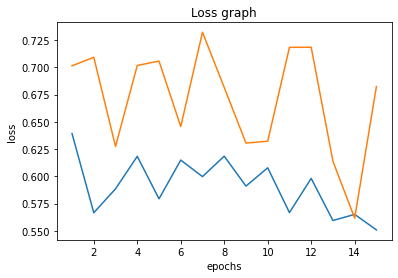

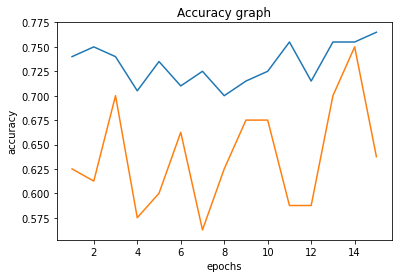

In [ ]:
plot_metrics(history,epochs)

In [ ]:
loss, acc = model.evaluate_generator(test, steps=3, verbose=1)

3/3 [==============================] - 2s 539ms/step - loss: 0.6845 - acc: 0.6333


In [ ]:
model.save('my_model.h5')